<H2>Part 1: dimensionality reduction

<H3>data importing

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target
df['diagnosis'] = df['target'].map({0: 'M', 1: 'B'})
df = df.drop(columns=['diagnosis'])
data= df.drop(columns=['target'])
target=df['target']
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<H3>PCA (Principal Component Analysis)

In [ ]:
import numpy as np
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std = None
        self.eigenvalues = None
        self.explained_variance_ratio = None
    def fit(self, X):
        # 1. Standardize (Mean = 0, Std = 1)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_scaled = (X - self.mean) / self.std

        # 2. Covariance Matrix
        # rowvar=False means columns are variables
        cov_matrix = np.cov(X_scaled, rowvar=False)

        # 3. Eigenvalue Decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 4. Sort Eigenvectors by Eigenvalues (Descending)
        # Transpose eigenvectors so they are row-wise for easier indexing
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        
        self.eigenvalues = eigenvalues[idxs]
        self.components = eigenvectors[idxs][0:self.n_components]

        # 5. Explained Variance Ratio
        total_variance = np.sum(self.eigenvalues)
        self.explained_variance_ratio = self.eigenvalues[:self.n_components] / total_variance
        
        return self

    def transform(self, X):
      
        X_scaled = (X - self.mean) / self.std
      
        return np.dot(X_scaled, self.components.T)
    def inverse_transform(self, X_pca):
        # Project back to original feature space
        X_reconstructed_scaled = np.dot(X_pca, self.components)
        # Un-scale and un-center
        return (X_reconstructed_scaled * self.std) + self.mean

    def get_reconstruction_error(self, X):
        X_pca = self.transform(X)
        X_reconstructed = self.inverse_transform(X_pca)
        # Mean Squared Error between original and reconstructed
        return np.mean(np.square(X - X_reconstructed))

In [18]:

for n_component in [2, 5, 10, 15, 20]:
    pca = PCA(n_components=n_component)
    pca.fit(data.values)

    data_reduced = pca.transform(data.values)
    reconstruction_error = pca.get_reconstruction_error(data.values)
    print(f"\nNumber of Components: {n_component}")
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio}")
    print(f"Total Variance Captured: {np.sum(pca.explained_variance_ratio):.2%}")
    print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")


Number of Components: 2
Explained Variance Ratio: [0.44272026 0.18971182]
Total Variance Captured: 63.24%
Reconstruction Error (MSE): 809.7928

Number of Components: 5
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
Total Variance Captured: 84.73%
Reconstruction Error (MSE): 729.8173

Number of Components: 10
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Total Variance Captured: 95.16%
Reconstruction Error (MSE): 515.5582

Number of Components: 15
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783]
Total Variance Captured: 98.65%
Reconstruction Error (MSE): 249.0515

Number of Components: 20
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.

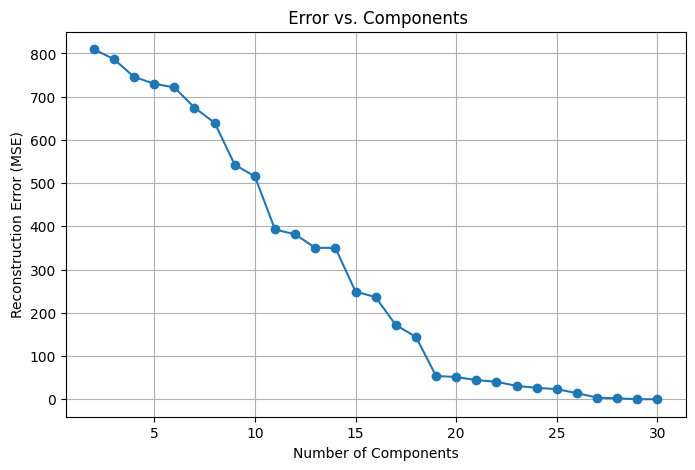

In [28]:
import matplotlib.pyplot as plt
components_list = range(2, data.shape[1] + 1)
errors = []

for n in components_list:
    pca_test = PCA(n_components=n)
    pca_test.fit(data.values)
    errors.append(pca_test.get_reconstruction_error(data.values))

plt.figure(figsize=(8, 5))
plt.plot(components_list, errors, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title(' Error vs. Components')
plt.grid(True)
plt.show()

<H3>outlier detection

In [ ]:

pca = PCA(n_components=2) 

pca.fit(data.values) 

#  compress and decompress
data_pca = pca.transform(data.values)
data_reconstructed = pca.inverse_transform(data_pca)
# 'Difference' (Error)
# We compare the original data to the reconstructed data
reconstruction_errors = np.sum(np.square(data.values - data_reconstructed), axis=1)

# 5. Find the 'Weirdest' 5% (Anomalies)
threshold = np.percentile(reconstruction_errors, 95)  # sort all the values and find the value that cuts off the top 5%
outliers = reconstruction_errors > threshold

print(f"Detected {np.sum(outliers)} potential outliers.")

Detected 29 potential outliers.


<H4>graphing outlier

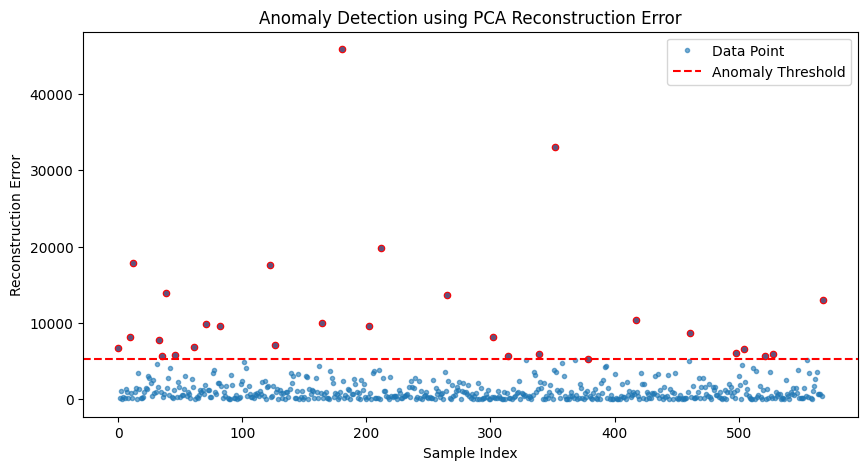

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(reconstruction_errors, 'o', markersize=3, alpha=0.6, label='Data Point')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')

# Highlight detected outliers in red
outlier_indices = np.where(outliers)[0]
plt.scatter(outlier_indices, reconstruction_errors[outlier_indices], color='red', s=20)

plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection using PCA Reconstruction Error')
plt.legend()
plt.show()

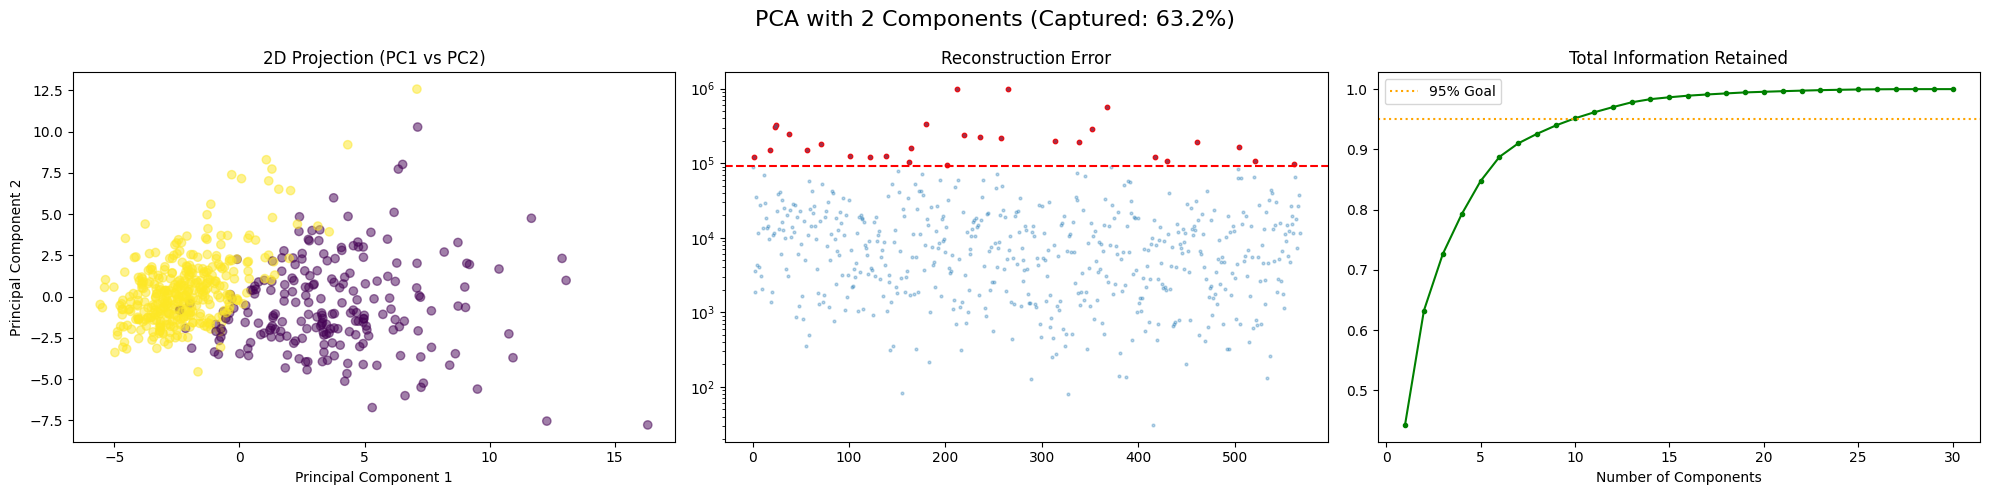

Done for n=2. Error dropped to: 24293.7825


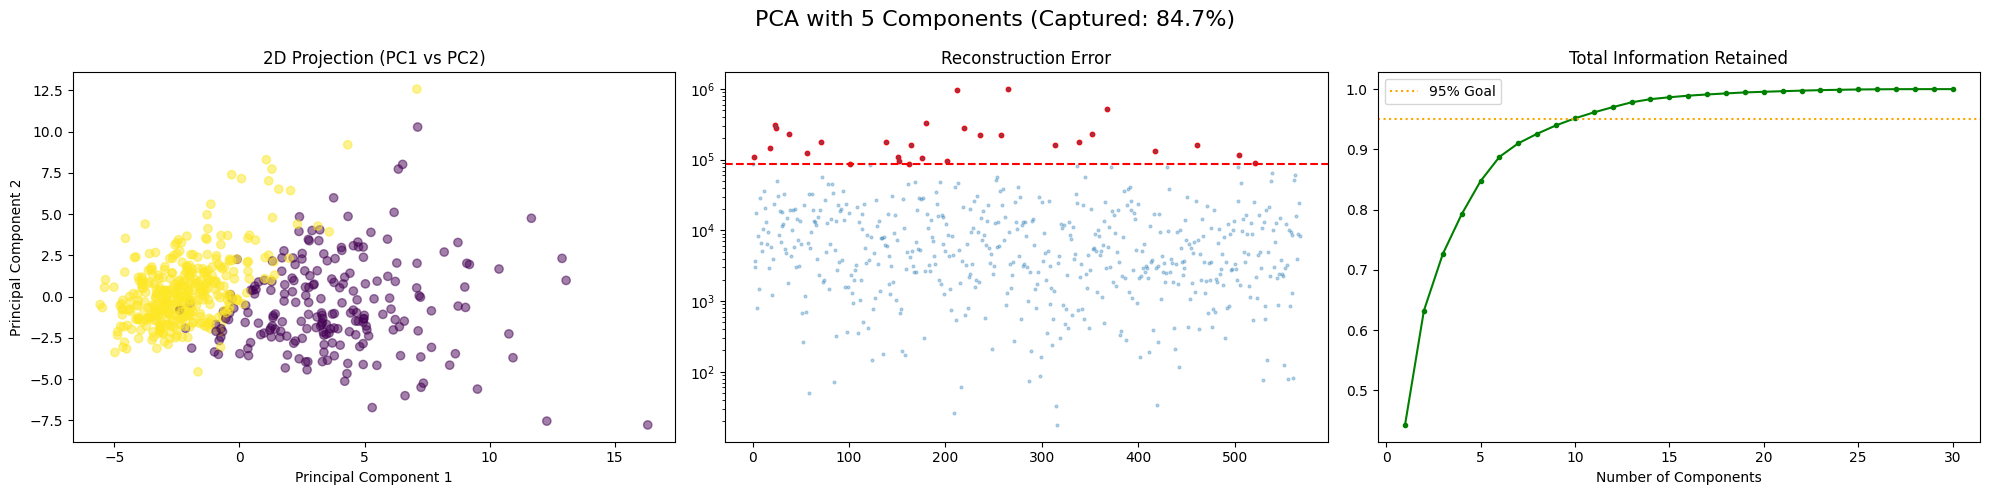

Done for n=5. Error dropped to: 21894.5202


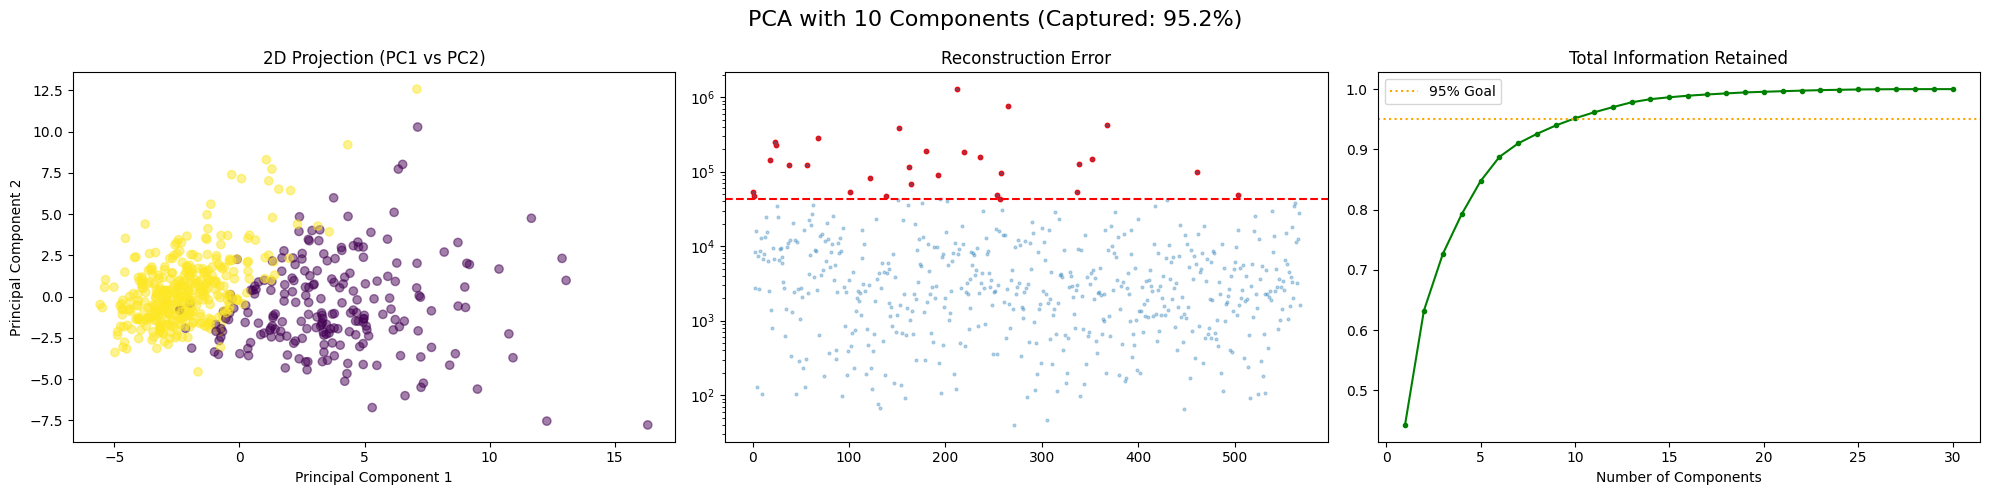

Done for n=10. Error dropped to: 15466.7446


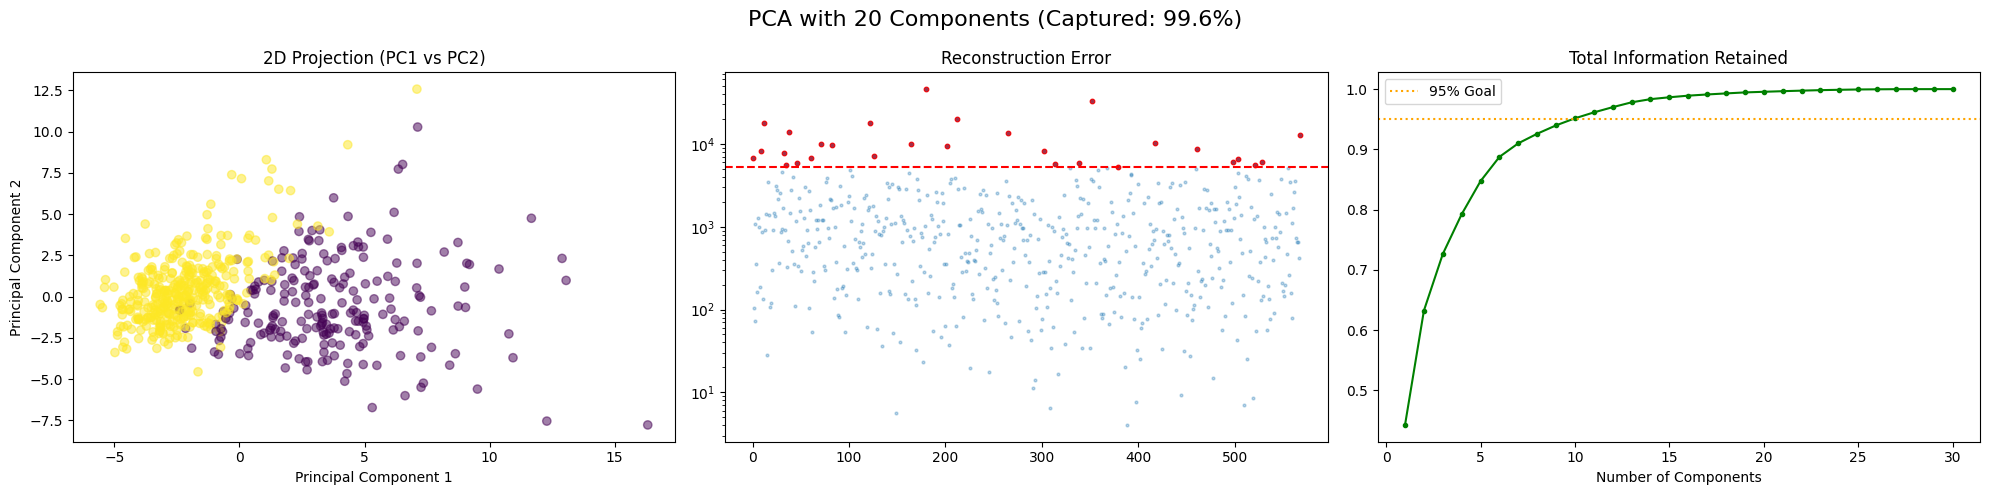

Done for n=20. Error dropped to: 1542.1077


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# We iterate through different levels of compression
for n_component in [2, 5, 10, 20]:
    # 1. Fit the PCA with the specific number of components
    pca = PCA(n_components=n_component)
    pca.fit(data.values)
    
    # 2. Project and Reconstruct
    data_pca = pca.transform(data.values)
    data_reconstructed = pca.inverse_transform(data_pca)

    # 3. Calculate Error (Distance between Original and Reconstruction)
    reconstruction_errors = np.sum(np.square(data.values - data_reconstructed), axis=1)
    threshold = np.percentile(reconstruction_errors, 95)
    outliers = reconstruction_errors > threshold

    # --- VISUALIZATION ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'PCA with {n_component} Components (Captured: {np.sum(pca.explained_variance_ratio):.1%})', fontsize=16)

    # Subplot 1: The 2D Projection
    # We always plot the first two axes to see how they separate the classes
    scatter = axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.5)
    axes[0].set_title('2D Projection (PC1 vs PC2)')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')

    # Subplot 2: Reconstruction Error (Anomaly Detection)
    axes[1].plot(reconstruction_errors, 'o', markersize=2, alpha=0.3)
    axes[1].axhline(y=threshold, color='r', linestyle='--', label='95% Threshold')
    outlier_idx = np.where(outliers)[0]
    axes[1].scatter(outlier_idx, reconstruction_errors[outlier_idx], color='red', s=10)
    axes[1].set_title('Reconstruction Error')
    axes[1].set_yscale('log') # Log scale helps see small errors at high N

    # Subplot 3: Cumulative Variance (The "Information" Chart)
    cum_var = np.cumsum(pca.eigenvalues) / np.sum(pca.eigenvalues)
    axes[2].plot(range(1, len(cum_var)+1), cum_var, 'g-o', markersize=3)
    axes[2].axhline(y=0.95, color='orange', linestyle=':', label='95% Goal')
    axes[2].set_title('Total Information Retained')
    axes[2].set_xlabel('Number of Components')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"Done for n={n_component}. Error dropped to: {np.mean(reconstruction_errors):.4f}")

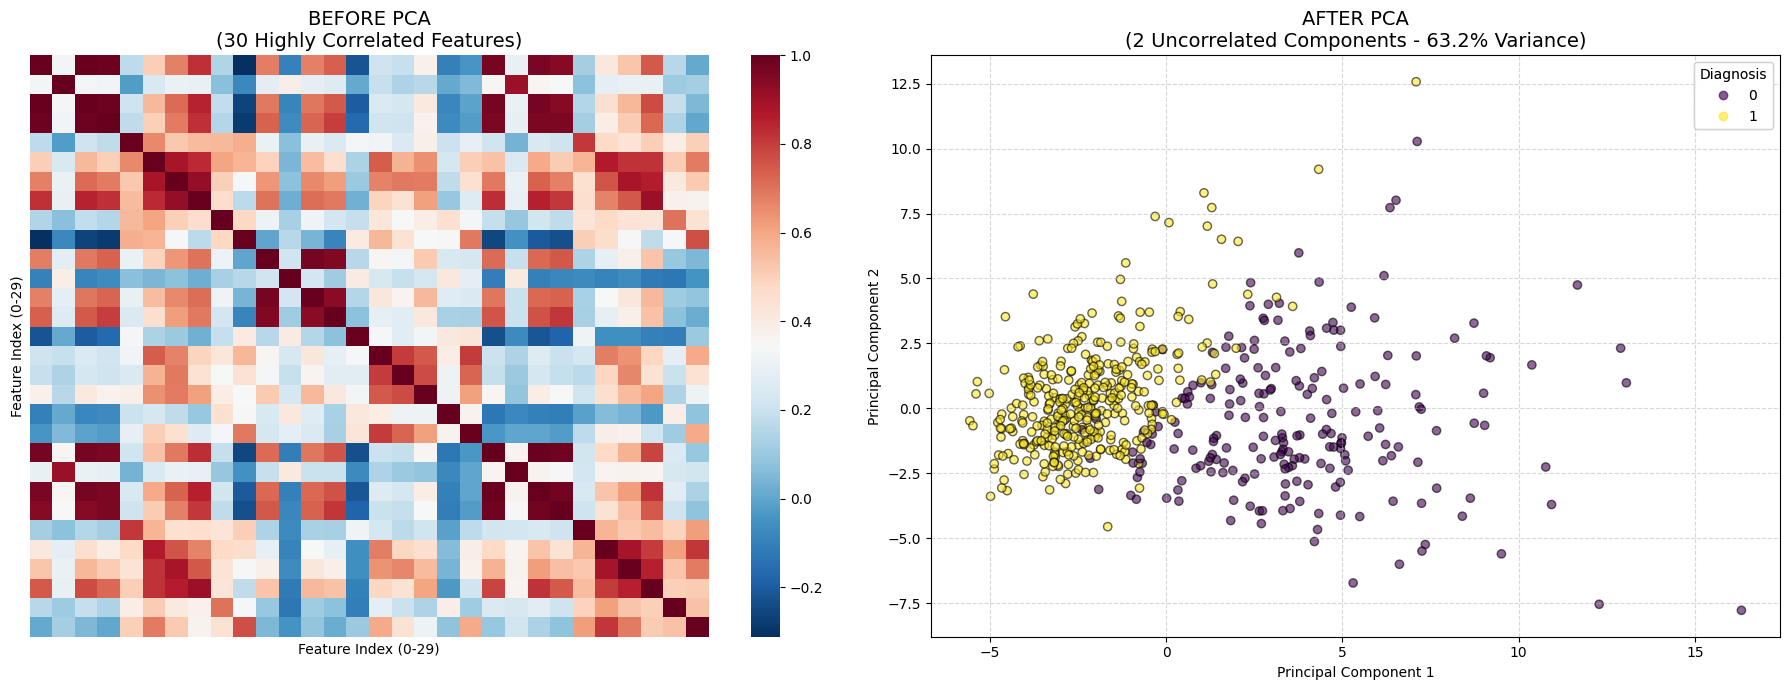

In [ ]:



pca = PCA(n_components=2)
pca.fit(df.values)
data_pca = pca.transform(df.values)

# 3. VISUALIZATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='RdBu_r', ax=ax1, cbar=True, xticklabels=False, yticklabels=False)
ax1.set_title("BEFORE PCA\n(30 Highly Correlated Features)", fontsize=14)
ax1.set_xlabel("Feature Index (0-29)")
ax1.set_ylabel("Feature Index (0-29)")


scatter = ax2.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.set_title(f"AFTER PCA\n(2 Uncorrelated Components - {np.sum(pca.explained_variance_ratio):.1%} Variance)", fontsize=14)
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

legend1 = ax2.legend(*scatter.legend_elements(), title="Diagnosis")
ax2.add_artist(legend1)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

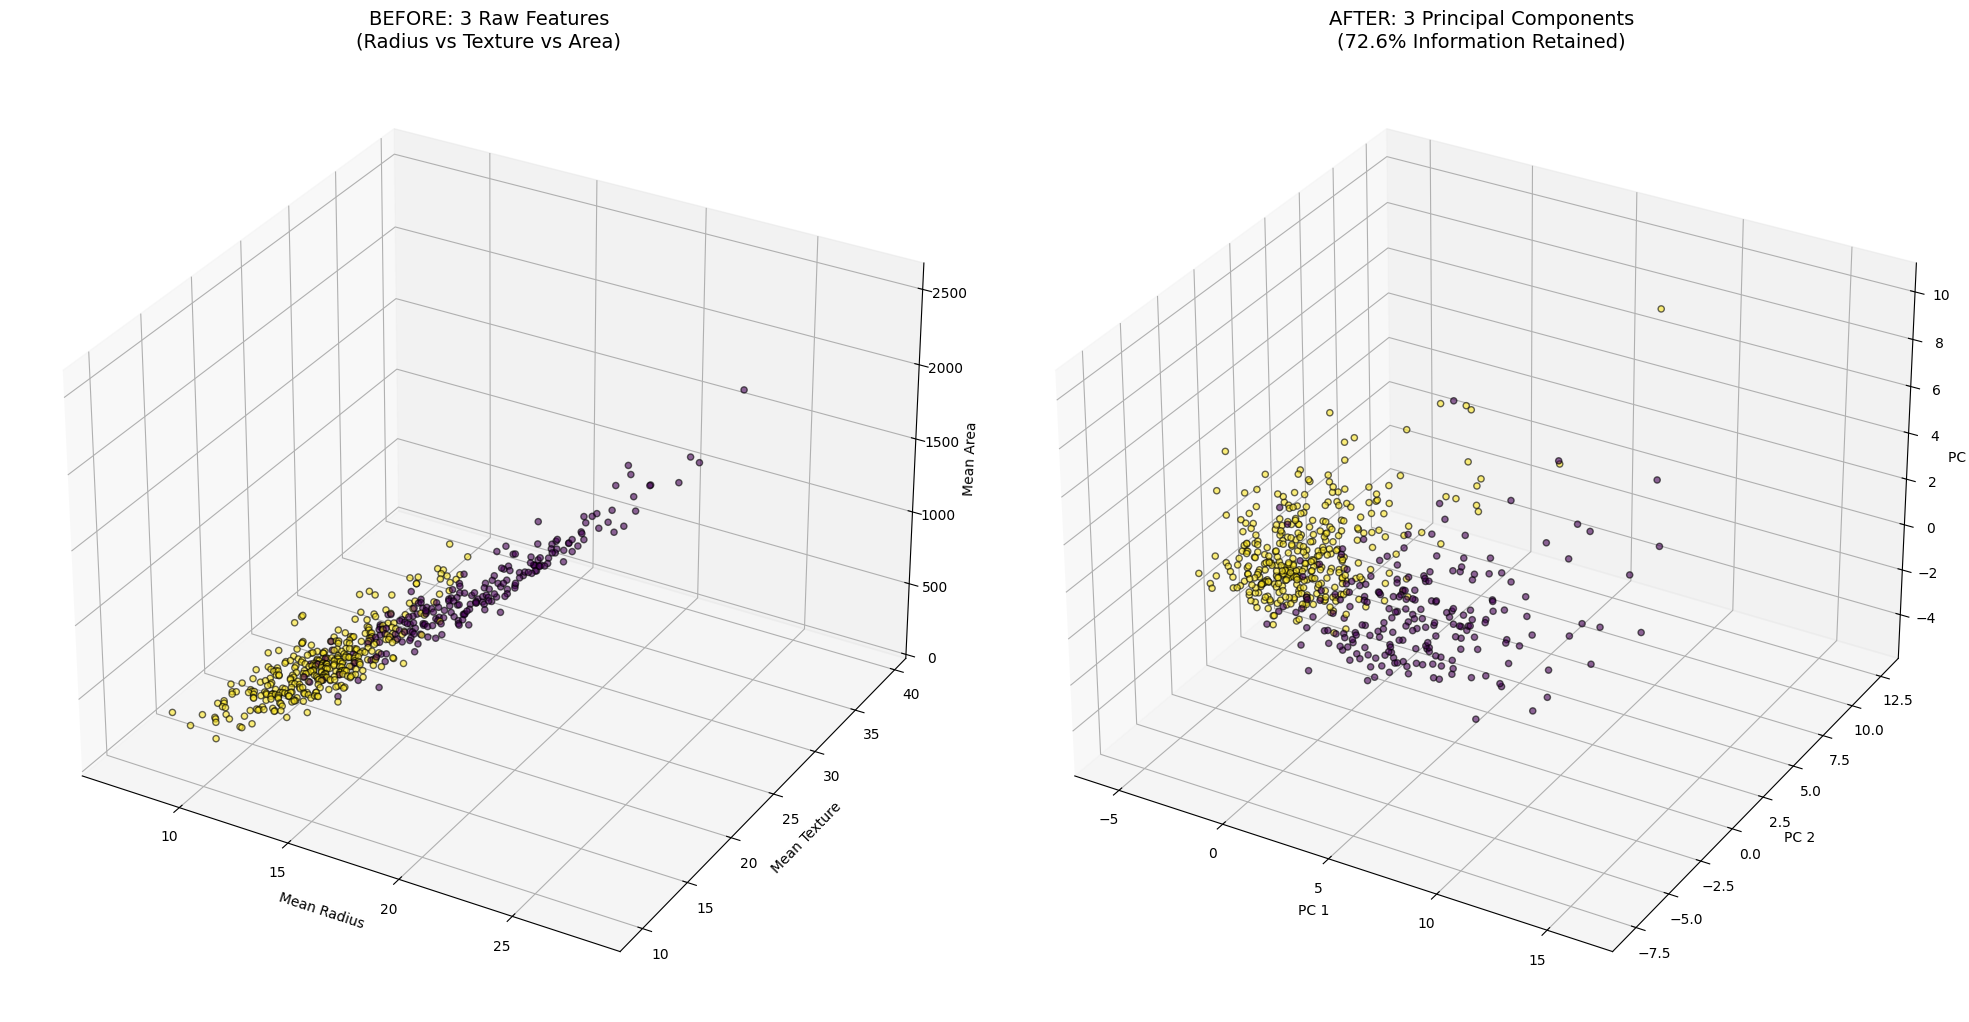

In [38]:

from mpl_toolkits.mplot3d import Axes3D




pca = PCA(n_components=3).fit(df.values)
data_pca_3d = pca.transform(df.values)


fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 3], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax1.set_title("BEFORE: 3 Raw Features\n(Radius vs Texture vs Area)", fontsize=14)
ax1.set_xlabel('Mean Radius')
ax1.set_ylabel('Mean Texture')
ax1.set_zlabel('Mean Area')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.set_title(f"AFTER: 3 Principal Components\n({np.sum(pca.explained_variance_ratio):.1%} Information Retained)", fontsize=14)
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

plt.tight_layout()
plt.show()

<H3>3. K-Means Clustering

In [ ]:
import numpy as np

class Kmeans:
    def __init__(self, k=3, init_centroids='random', max_iters=300, tol=1e-4):
        self.k = k
        self.init_centroid_method = init_centroids 
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia_history = []

    def calc_inertia(self, X, labels):
        inertia = 0
        for i in range(self.k):
            points = X[labels == i]
            if len(points) > 0:
                # This is the sum of squared Euclidean distances
                inertia += np.sum((points - self.centroids[i])**2)
        return inertia

    def initialize_centroids(self, X): 
        if self.init_centroid_method == 'random':
            random_indices = np.random.choice(X.shape[0], self.k, replace=False)
            return X[random_indices]
        
        elif self.init_centroid_method == 'k-means++':
            centroids = [X[np.random.randint(X.shape[0])]]  
            for _ in range(1, self.k):
                
                distances = np.array([np.min([np.sum((x - c)**2) for c in centroids]) for x in X])
                probs = distances / distances.sum()
               
                next_idx = np.random.choice(X.shape[0], p=probs)
                centroids.append(X[next_idx])
            return np.array(centroids)
        else:
            raise ValueError("Unsupported initialization method.")

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        
        for i in range(self.max_iters):
       
            distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
            self.labels = np.argmin(distances, axis=1)
            
            current_inertia = self.calc_inertia(X, self.labels)
            self.inertia_history.append(current_inertia)



            new_centroids = np.array([X[self.labels == j].mean(axis=0) if len(X[self.labels == j]) > 0 else self.centroids[j] for j in range(self.k)])
            
            
            center_shift = np.sum(np.sqrt(np.sum((self.centroids - new_centroids)**2, axis=1)))
            self.centroids = new_centroids
            
            if center_shift < self.tol:
                break
                
        return self
    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)         

In [ ]:
# Generate dummy data
X = np.random.rand(100, 2)

# Run with K-Means++
model = KMeans(k=3, init='k-means++')
model.fit(X)

print(f"Final Inertia: {model.inertia_history[-1]}")

## 2. autoencodeer

In [1]:
# activation functions
import numpy as np
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [2]:
# one layer class
class DenseLayer:
    def __init__(self, input_dim, output_dim, activation='relu'):
        self.W = np.random.randn(input_dim, output_dim) * 0.01 # initialize weights with small values
        self.b = np.zeros((1, output_dim)) # initialize bias with zero
        self.activation_type = activation

        self.input = None
        self.z = None
        self.dW = None
        self.db = None

    def _activate(self, z):
        if self.activation_type == 'relu':
            return relu(z)
        elif self.activation_type == 'sigmoid':
            return sigmoid(z)
        elif self.activation_type == 'tanh':
            return tanh(z)
        return z

    def _activate_derivative(self, z):
        if self.activation_type == 'relu':
            return relu_derivative(z)
        elif self.activation_type == 'sigmoid':
            return sigmoid_derivative(z)
        elif self.activation_type == 'tanh':
            return tanh_derivative(z)
        return np.ones_like(z)

    def forward(self, x):
        # forwatd pass: a = activation(z = X . W + b) 
        self.input = x
        self.z = np.dot(self.input, self.W) + self.b
        return self._activate(self.z)

    def backward(self, dL_da):
        batch_size = self.input.shape[0]
        da_dz= self._activate_derivative(self.z )
        dL_dz= dL_da * da_dz 
        self.dW= np.dot(self.input.T , dL_dz ) / batch_size # divide by batch size here instead of during update
        self.db= np.sum(dL_dz , axis=0, keepdims=True) / batch_size
        dL_dx= np.dot(dL_dz , self.W.T)
        return dL_dx

    def update(self, lr, lmbda=0.0):
        # 4. Update parameters (with optional L2 regularization)
        self.W -= lr * (self.dW + lmbda * self.W)
        self.b -= lr * self.db

In [3]:
# loss functions
def mse(y_true, y_pred):
    return np.mean(np.power(y_pred - y_true , 2))
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.shape[0]

In [4]:
class Autoencoder:
    def __init__(self, layer_sizes, layer_activations, learning_rate=0.01, lmbda=0.0):
        """
        if layer_sizes is of size N 
        layer_activations must be of size N-1
        final(first in list of layer_activations) layer must not be relu
        """
        # simple validation
        if len(layer_activations) != len(layer_sizes) - 1:
            raise ValueError(f"Expected {len(layer_sizes)-1} activations, got {len(layer_activations)}")
        final_output_act = layer_activations[0] 
        if final_output_act == 'relu':
            print("Warning: ReLU in final reconstruction layer may clip values.")
        self.encoder = []
        self.decoder = []
        self.lr = learning_rate
        self.lmbda = lmbda
        self.loss_hist = []
        #build encoder
        for i in range(len(layer_sizes) - 1):
            self.encoder.append(DenseLayer(
                input_dim=layer_sizes[i], 
                output_dim=layer_sizes[i+1], 
                activation=layer_activations[i]
            ))
        #build decoder (encoder reverse)
        decoder_sizes = layer_sizes[::-1]
        decoder_activations = layer_activations[::-1] 
        for i in range(len(decoder_sizes) - 1):
            self.decoder.append(DenseLayer(
                input_dim=decoder_sizes[i], 
                output_dim=decoder_sizes[i+1], 
                activation=decoder_activations[i]
            ))
        # Metadata
        self.latent_size = layer_sizes[-1]     
        
    def forward(self,x):
        for l_e in self.encoder:
            x = l_e.forward(x)
        for l_d in self.decoder:
            x = l_d.forward(x)
        return x  # x_hat
    
    def backward(self, x, x_hat):
        dL = mse_derivative(x, x_hat)
        for l in reversed(self.decoder):
            dL = l.backward(dL)
        for l in reversed(self.encoder):
            dL = l.backward(dL)
            
    def update(self, lr):
        all_layers = self.encoder + self.decoder
        for l in all_layers:
            l.update(lr,self.lmbda)
    def encode(self, x): # Latent variable extraction 
        output = x
        for layer in self.encoder:
            output = layer.forward(output)
        return output
    def reconstruction_error(self, x):
        x_hat = self.forward(x)
        return mse(x, x_hat)

    def train(self, x_train , epochs , mini_batch_size , lr_decay = 0.0):
        for epoch in range(epochs):
            # shuffle to avoid learning the order
            indices = np.arange(x_train.shape[0])
            np.random.shuffle(indices)
            x_shuffled = x_train[indices]
            # training loop
            for i in range(0 , x_train.shape[0],mini_batch_size ):
                mini_batch = x_shuffled[i : i + mini_batch_size]
                
                mini_batch_hat = self.forward(mini_batch)
                
                self.backward(mini_batch,mini_batch_hat)
                # learning rate scheduling
                curr_lr = self.lr / (1 + lr_decay * epoch)
                
                self.update(curr_lr)
            # track loss history (for plotting later)
            self.loss_hist.append(self.reconstruction_error(x_train))
        
        